# **BankruptWatch**

## BankruptWatch: A Machine Learning Approach to Bankruptcy Prediction
BankruptWatch is a project focused on predicting the likelihood of bankruptcy for companies based on the dataset obtained from the Taiwan Economic Journal spanning from 1999 to 2009. The determination of a company's bankruptcy status is influenced by business regulations issued by the Taiwan Stock Exchange.

Dataset : https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction?datasetId=1111894&sortBy=voteCount

# **-----------------------------------------------------**

# **Read and Explore Data**

Read Data

In [15]:
data = pd.read_csv('../input/company-bankruptcy-prediction/data.csv')
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


Menunjukan total baris dan kolom dari data

In [16]:
data.shape

(6819, 96)

Pengecakan null serta duplicate dari dataset

In [17]:
data.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [18]:
data.duplicated().sum()

0

Membuat tabel dengan informasi dari dataset dari jumlah baris dan kolom hingga tipe data 

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

# **-----------------------------------------------------**

# **Data Visualization**

**1. Scatter Plot**


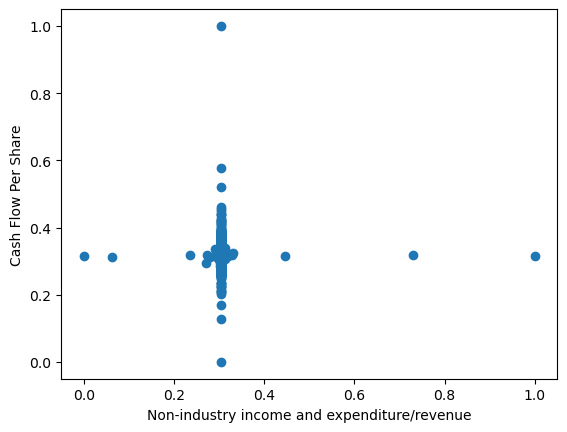

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming data is your DataFrame

# Remove leading and trailing spaces from column names
data.columns = data.columns.str.strip()

# Plot the scatter plot
plt.scatter(data['Non-industry income and expenditure/revenue'], data['Cash Flow Per Share'])
plt.xlabel('Non-industry income and expenditure/revenue')
plt.ylabel('Cash Flow Per Share')
plt.show()


**2. Bar Plot**

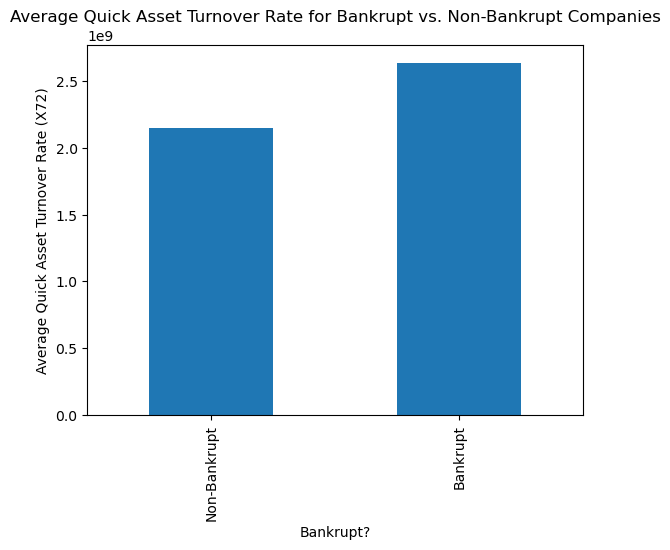

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming data is your DataFrame

# Group the data by the 'Bankrupt' column and calculate the average of 'X72'
grouped_data = data.groupby('Bankrupt?')['Quick Asset Turnover Rate'].mean()

# Create a bar plot
grouped_data.plot(kind='bar')
plt.xlabel('Bankrupt?')
plt.ylabel('Average Quick Asset Turnover Rate (X72)')
plt.title('Average Quick Asset Turnover Rate for Bankrupt vs. Non-Bankrupt Companies')
plt.xticks([0, 1], ['Non-Bankrupt', 'Bankrupt'])
plt.show()


**3. Box Plot**

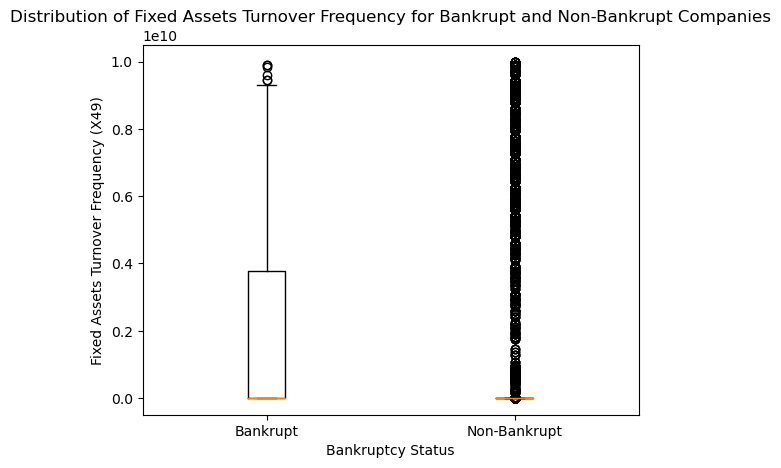

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame called 'data'

# Filter the data for bankrupt and non-bankrupt companies
bankrupt_data = data[data['Bankrupt?'] == 1]  # Filter for bankrupt companies
non_bankrupt_data = data[data['Bankrupt?'] == 0]  # Filter for non-bankrupt companies

# Create a list of the filtered data
data_to_plot = [bankrupt_data['Fixed Assets Turnover Frequency'], non_bankrupt_data['Fixed Assets Turnover Frequency']]

# Create the box plot
plt.boxplot(data_to_plot, labels=['Bankrupt', 'Non-Bankrupt'])
plt.xlabel('Bankruptcy Status')
plt.ylabel('Fixed Assets Turnover Frequency (X49)')
plt.title('Distribution of Fixed Assets Turnover Frequency for Bankrupt and Non-Bankrupt Companies')
plt.show()

# **-----------------------------------------------------**

# **Exploratory Data Analysis (EDA)**

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Pengecakan target variable

In [24]:
data['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

Text(0.5, 1.0, 'Target fitur : Bankrupt?')

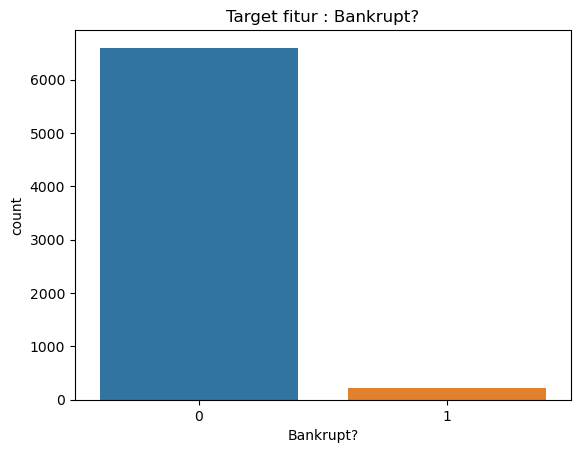

In [25]:
sns.countplot(x=data['Bankrupt?'])
plt.title('Target fitur : Bankrupt?')

Terlihat target value tidak imbang, maka diperlukan oversample

## Oversampling

Oversampling dilakukan dengan menggunakan SMOTE
> SMOTE (Synthetic Minority Over-sampling Technique) adalah teknik yang digunakan untuk mengatasi dataset yang tidak seimbang dalam pembelajaran mesin. Teknik ini berfokus pada masalah klasifikasi yang tidak seimbang di mana kelas minoritas memiliki sedikit contoh dibandingkan dengan kelas mayoritas. 

In [26]:
from imblearn.over_sampling import SMOTE
X=data.drop(labels=['Bankrupt?'], axis=1)
y=data['Bankrupt?']
oversample = SMOTE()
X,y=oversample.fit_resample(X,y)

<Axes: xlabel='Bankrupt?', ylabel='count'>

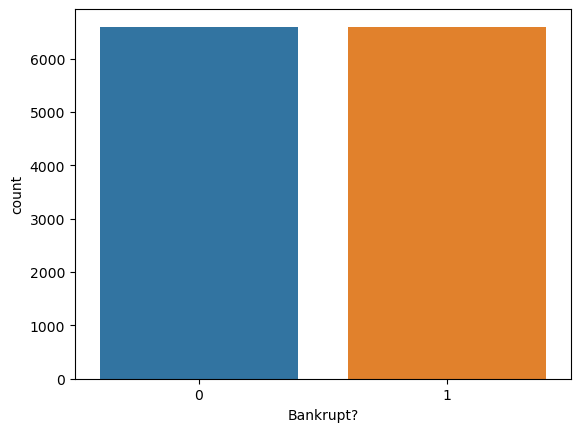

In [27]:
sns.countplot(x=y)

Feature Selection

In [28]:
from sklearn.preprocessing import StandardScaler

Pemilihan 30 variabel independen dari total 96 variabel

In [29]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

# Identify constant features
constant_features = np.all(X == X.iloc[0, :], axis=0)
X_without_constants = X.loc[:, ~constant_features]

# Perform feature selection on the modified dataset
feature_selection = SelectKBest(f_classif, k=30)
X_selected = feature_selection.fit_transform(X_without_constants, y)

# Get the indices of the selected features
selected_indices = feature_selection.get_support(indices=True)

# Remove the non-selected features from the modified dataset
X_selected_features = X_without_constants.iloc[:, selected_indices]


In [30]:
import numpy as np

selected_features = X.columns[feature_selection.get_support(indices=True)]

Standarisasi dari variabel independen sebelumnya

In [31]:
scaler=StandardScaler()
X_scale=scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scale, y,test_size=0.3)

# **Machine Learning**

**1. Import Libraries**

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

**2. Load Dataset**

In [33]:
data = pd.read_csv('../input/company-bankruptcy-prediction/data.csv')

**3. Preprocess Data**

In [34]:
# Separate the features (X) and the target variable (y)
X = data.drop('Bankrupt?', axis=1)
y = data['Bankrupt?']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values (if any)
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**4. Cross-Validation**

In [35]:
# Create an AdaBoost classifier with default parameters
ada_boost = AdaBoostClassifier()

# Define the parameter grid for AdaBoost
ada_boost_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0]
}

# Perform grid search cross-validation for AdaBoost
ada_boost_grid_search = GridSearchCV(ada_boost, param_grid=ada_boost_param_grid, cv=5)
ada_boost_grid_search.fit(X_train, y_train)

# Get the best AdaBoost model
best_ada_boost = ada_boost_grid_search.best_estimator_

# Create a Random Forest classifier with default parameters
random_forest = RandomForestClassifier()

# Define the parameter grid for Random Forest
random_forest_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10]
}

# Perform grid search cross-validation for Random Forest
random_forest_grid_search = GridSearchCV(random_forest, param_grid=random_forest_param_grid, cv=5)
random_forest_grid_search.fit(X_train, y_train)

# Get the best Random Forest model
best_random_forest = random_forest_grid_search.best_estimator_


**5. Prediction AdaBoost**

In [36]:
# Make predictions on the test set using the best AdaBoost model
ada_boost_predictions = best_ada_boost.predict(X_test)
ada_boost_accuracy = accuracy_score(y_test, ada_boost_predictions)
print("Best AdaBoost Accuracy:", ada_boost_accuracy)

Best AdaBoost Accuracy: 0.9633431085043989


**6. Prediction Random Forest**

In [37]:
# Make predictions on the test set using the best Random Forest model
random_forest_predictions = best_random_forest.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
print("Best Random Forest Accuracy:", random_forest_accuracy)

Best Random Forest Accuracy: 0.9648093841642229
